In [ ]:
# Image Classification using Convolutional Neural Network architecture



In [20]:
# Import libraries
# Import libraries

import os
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Activation, ZeroPadding2D,Input,InputLayer,Dropout
from keras.models import save_model, load_model
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Model,Sequential
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
os.chdir("/home/pjoshi/github/extras/CNN")


In [21]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [22]:
# Reshape the training dataset 

In [23]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
X = np.array(data_train.iloc[:, 1:])
X = X.reshape(X.shape[0], img_rows, img_cols, 1)
y = np_utils.to_categorical(np.array(data_train.iloc[:, 0:1]))

In [24]:
X_test = np.array(data_test.iloc[:, 1:])
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
y_test = to_categorical(np.array(data_test.iloc[:, 0:1])) 

X = X.astype('float32') 
X_test = X_test.astype('float32') 
X /= 255
X_test /= 255

In [25]:
def train_model(shape=(28, 28, 1), num_classes=10):
    X_input = Input(shape=shape)

    
    X = Conv2D(32,
               kernel_size=(3, 3),
               activation='relu',
               kernel_initializer='he_normal',
               input_shape=input_shape)(X_input)
    X = MaxPool2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)
    X = Conv2D(64, (3, 3), activation='relu')(X)
    X = MaxPool2D(pool_size=(2, 2))(X)
    X = Dropout(0.3)(X)
    X = Conv2D(128, (3, 3), activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Flatten()(X)
    X = Dense(128, activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(num_classes, activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X, name="CNN")
    return model

In [26]:
model = train_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y,batch_size=1024, epochs=30,
          validation_split =0.01)


Train on 57115 samples, validate on 577 samples
Epoch 1/30
57115/57115 [==============================] - 18s - loss: 0.1937 - acc: 0.9276 - val_loss: nan - val_acc: 0.9506
Epoch 2/30
57115/57115 [==============================] - 18s - loss: 0.1138 - acc: 0.9535 - val_loss: nan - val_acc: 0.9610
Epoch 3/30
57115/57115 [==============================] - 18s - loss: 0.0989 - acc: 0.9592 - val_loss: nan - val_acc: 0.9640
Epoch 4/30
57115/57115 [==============================] - 18s - loss: 0.0904 - acc: 0.9631 - val_loss: nan - val_acc: 0.9667
Epoch 5/30
57115/57115 [==============================] - 18s - loss: 0.0841 - acc: 0.9654 - val_loss: nan - val_acc: 0.9692
Epoch 6/30
57115/57115 [==============================] - 18s - loss: 0.0794 - acc: 0.9681 - val_loss: nan - val_acc: 0.9692
Epoch 7/30
57115/57115 [==============================] - 18s - loss: 0.0757 - acc: 0.9695 - val_loss: nan - val_acc: 0.9714
Epoch 8/30
57115/57115 [==============================] - 18s - loss: 0.0719 

In [30]:

import matplotlib.pyplot as plt
import numpy as np

X2_train = pd.read_csv('fashion-mnist_train.csv')

X2_train = np.array(X2_train.iloc[:, 1:])
#X2_train, y2_train = mnist_reader.load_mnist(‘data/fashion’, kind=’train’)
X3_train = X2_train.reshape(X2_train.shape[0], 1, 28, 28)



In [ ]:
# classes 
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot

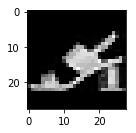

array([[ 0.21326925,  0.0192831 ,  0.1307362 ,  0.02264464,  0.11551749,
         0.25303435,  0.09286338,  0.04200984,  0.03801447,  0.07262722]], dtype=float32)

In [33]:
#Code to do preview and prediction

plt.subplot(222)
img_number = 50
plt.imshow(np.squeeze(X3_train[img_number], axis=0),cmap=plt.get_cmap('gray'))
plt.show()
clf.predict(np.expand_dims(X3_train[img_number], axis=0))

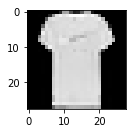

array([[ 0.58427596,  0.00735493,  0.00105215,  0.0189042 ,  0.00243392,
         0.13157761,  0.00177279,  0.02135747,  0.00080195,  0.23046905]], dtype=float32)

In [62]:
#Code to do preview and prediction

plt.subplot(222)
img_number = 10
plt.imshow(np.squeeze(X3_train[img_number], axis=0),cmap=plt.get_cmap('gray'))
plt.show()
clf.predict(np.expand_dims(X3_train[img_number], axis=0))

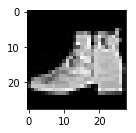

array([[ 0.14181238,  0.01897477,  0.11690673,  0.02524759,  0.03281223,
         0.27960724,  0.05395802,  0.05905114,  0.00284189,  0.26878798]], dtype=float32)

In [40]:
plt.subplot(222)
img_number = 56
plt.imshow(np.squeeze(X3_train[img_number], axis=0),cmap=plt.get_cmap('gray'))
plt.show()
clf.predict(np.expand_dims(X3_train[img_number], axis=0))

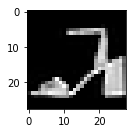

array([[ 0.06730712,  0.00712029,  0.08150284,  0.00760865,  0.21908043,
         0.25341752,  0.10345683,  0.08768871,  0.01479599,  0.15802166]], dtype=float32)

In [44]:
plt.subplot(222)
img_number = 60
plt.imshow(np.squeeze(X3_train[img_number], axis=0),cmap=plt.get_cmap('gray'))
plt.show()
clf.predict(np.expand_dims(X3_train[img_number], axis=0))

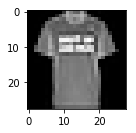

array([[ 0.4203617 ,  0.01119438,  0.01304665,  0.12608837,  0.01972732,
         0.13386218,  0.01583378,  0.03827314,  0.0041456 ,  0.21746689]], dtype=float32)

In [79]:
plt.subplot(222)
img_number = 44
plt.imshow(np.squeeze(X3_train[img_number], axis=0),cmap=plt.get_cmap('gray'))
plt.show()
clf.predict(np.expand_dims(X3_train[img_number], axis=0))